<a href="https://colab.research.google.com/github/sebastianloaa/escuela/blob/main/Anova_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANOVA de un factor

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

### Los datos

In [ ]:
tiempo = np.array([62, 60, 63, 59, 63, 67, 71, 64, 65, 66, 68, 66, 71, 67, 68, 68, 56, 62, 60, 61, 63, 64, 63, 59])
tratamiento = np.array(["A", "A", "A", "A", "B", "B", "B", "B", "B", "B", "C", "C", "C", "C", "C", "C", "D", "D", "D", "D", "D", "D", "D", "D"])
datos = pd.DataFrame({'tiempo': tiempo, 'tratamiento': tratamiento})

### Las hipótesis

$H_o: \mu_i = \mu_j$ donde $j>i$ para $i,j = 1, 2,3, 4$

$H_1: \mu_i \neq \mu_j$ para algún $i,j = 1, 2,3, 4$

$\alpha = 0.05$

### ANOVA y Regresión lineal simple

In [ ]:
model = ols('tiempo ~ C(tratamiento)', datos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Fuerza   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.160
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               1.00
Time:                        03:13:38   Log-Likelihood:                -87.504
No. Observations:                  30   AIC:                             185.0
Df Residuals:                      25   BIC:                             192.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             35.0000      4.899      7.144      0.000      24.910      45.090
C(Potencia)[T.60]  -1.923e-14      5.196   -3.7e-15      1.000     -10.702      10.702
C(Potencia)[T.75]  -3.553e-15      5.099  -6.97e-16      1.000     -10.502      10.502
C(Potencia)[T.90]   -3.55e-15      5.196  -6.83e-16      1.000     -10.702      10.702
C(Potencia)[T.105]  2.649e-15      6.928   3.82e-16      1.000     -14.269      14.269
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   3.708
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.312
Skew:                           0.000   Prob(JB):                        0.855
Kurtosis:                       2.500   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El Estadístico de prueba F* = 13.57 y su valor p es 0.0000466, por lo que, hay evidencia suficiente para rechazar Ho y afirmar que existen por lo menos dos medias que difieren significativamente entere sí.

### Representación de los datos por tratamiento con Diagrama de Caja y bigote

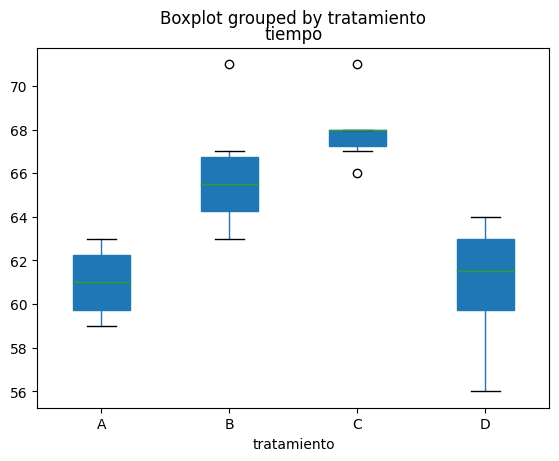

In [ ]:
# Boxplot
datos.boxplot(column='tiempo', by='tratamiento', grid=False, patch_artist=True)
plt.show()


Del gráfico se puede observar que los diagrama de caja y bigote de tratamiento AD se traslapan, lo mismo que los tratamiento BC, ¿pero será significativo? La prueba de Tukey podría ayudar en esto.  

**Complemento:** Otro gráfico de caja y bigote (que podría sustituir al anterior), pero con los datos sobrepuestos representados por puntos:

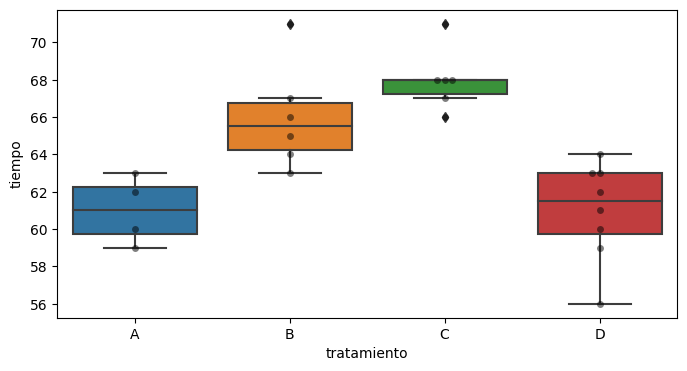

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="tratamiento", y="tiempo", data=datos, ax=ax)
sns.swarmplot(x="tratamiento", y="tiempo", data=datos, color='black', alpha = 0.5, ax=ax);

## Prueba de Tukey para las diferencias de medias

La prueba de Tukye ofrece un resultado de diferencia de medias con un valor p ajustado

In [ ]:
# Diferencias de medias (Tukey HSD)
tukey_result = pairwise_tukeyhsd(endog=tiempo, groups=tratamiento, alpha=0.05)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      5.0 0.0183   0.7246  9.2754   True
     A      C      7.0  0.001   2.7246 11.2754   True
     A      D      0.0    1.0   -4.056   4.056  False
     B      C      2.0 0.4766  -1.8241  5.8241  False
     B      D     -5.0 0.0044  -8.5771 -1.4229   True
     C      D     -7.0 0.0001 -10.5771 -3.4229   True
-----------------------------------------------------


Gráfico de los resultados:

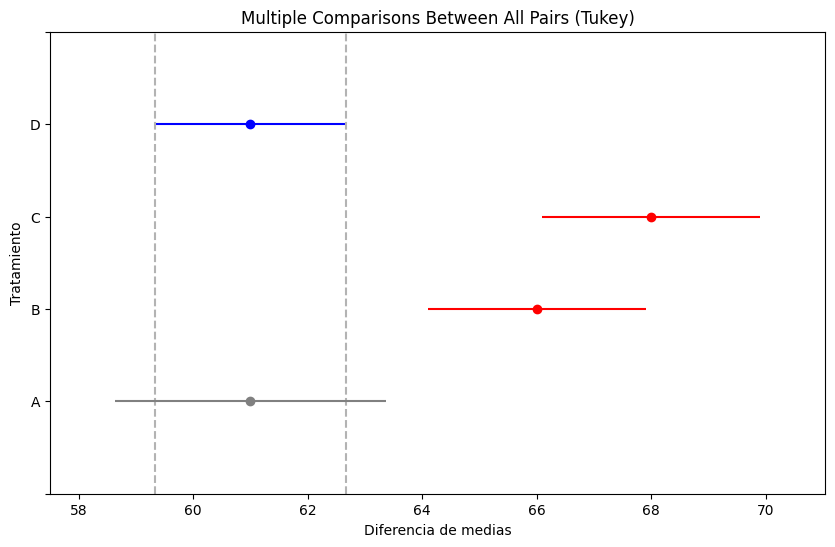

In [ ]:
tukey_result.plot_simultaneous(comparison_name='D', ylabel='Tratamiento', xlabel='Diferencia de medias')
plt.show()

In [ ]:
# Por lo que podemos concluir que los tratamientos AD son similares, lo mismo BC, pero AC difieren significatibamente de BC, a un nivel de significación de 0.05.